# COGS 108 - EDA Checkpoint

# Names

- Anson Choi
- Ashley Ko
- Ruichen Ma

<a id='research_question'></a>
# Research Question

Are there statistically significant demographic variables (such as gender and ethnic identity, age they started, occupation, and major) that make someone more likely to start kendo?

# Ethics

In conducting our data science project, we recognize the importance of addressing potential social and unintended consequences that may arise from our research. Our primary objective is to ensure that our data collection and analysis are conducted ethically and responsibly, taking into account the diverse perspectives and impacts that may be associated with our study.

Participants will be invited to complete the survey voluntarily and based on their own will and consent, with the freedom to discontinue the survey at any point without facing any negative consequences. However, we acknowledge the possibility of collection bias due to the distribution of the survey through Discord, as members who are more active on the platform may have a higher likelihood of participation compared to those who are less active.

While we will make efforts to mitigate this bias, we recognize that it may introduce unintended consequences, such as potential variations in interest among different demographics in the Kendo Club. If our findings were to reveal that Kendo was dominated by East Asian individuals, what impact would that have on non-East Asian interest and membership? Would our data discourage certain demographics from joining? To prevent this concern, we will keep our raw data confidential and only in the scope of this project. We will also not use this data to maliciously exclude certain communities from joining Kendo and rather use this data, as members of the Kendo board, to see what practices we can implement in the future to promote a more diverse club.

It is important to note that in addition to members, our survey data includes participants from other schools and alumni. We acknowledge that we cannot regulate how the survey was sent out to these participants, which may introduce additional biases and variations in responses. We will take this into consideration during our analysis and interpretation of the data.

To protect the privacy and confidentiality of our participants, we will limit the exposure of personally identifiable information (PII). Participants will be asked to provide only their names and will not be required to provide any additional identifying information such as PID. Furthermore, we will ensure that the survey questions are directly relevant to our research variables, avoiding any unnecessary intrusion into personal matters. The purpose and intended use of the collected data will be transparently communicated to all survey participants, allowing them to make informed decisions regarding their participation.

With regard to data security, we emphasize that the data collected will be used solely for academic purposes. The raw data obtained from the survey, hosted on Google Forms, will be accessible only to authorized team members. We will maintain the confidentiality of the data to the best of our ability and handle it in accordance with ethical data management practices.

Participants will have the right to withdraw their data at any time during the study, and we will explicitly inform them of this option within the survey itself. We are committed to respecting the autonomy of our participants and ensuring that their choices regarding data withdrawal are honored.

Additionally, we acknowledge that the ongoing COVID-19 pandemic may impact the data regarding the year in which students started Kendo. Given the restrictions on physical campus presence and limited club promotion activities during this time, it is possible that the interest and engagement of current second and third-year students in Kendo clubs may have been influenced. When analyzing our data, we will carefully consider the potential effects of the pandemic on students' ability to join the club, particularly during the specified time frame.

In summary, we are committed to conducting our data science project with a strong ethical foundation, ensuring that we address social and unintended consequences associated with our research. We uphold the principles of voluntary participation, privacy protection, data security, and transparent communication to uphold the integrity of our study and promote responsible data science practices.


# Setup

In [69]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [18]:
#Import the Raw Dataset created through google form surveys
df = pd.read_csv('Raw Data COGS 108 - Sheet1.csv')
df

,Timestamp,"What is your racial identity? (If you identify with multiple ethnicities, please choose other and specify.)","If you responded in the previous question that you identified as Asian / Pacific Islander, please specify your ethnic identity.",What is your gender identity?,Are you currently a college student?,What school do you attend?,Major,"If you started Kendo in college, what year did you start? (skip if inapplicable)(current)","If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)(current)",Occupation,Major in College if started outside of College,"If you started Kendo in college, what year did you start? (skip if inapplicable)","If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)"
0,5/15/2023 16:34:06,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,University of Washington,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,5/15/2023 16:35:01,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,University of Washington,Political Science,First Year,NaN,NaN,NaN,NaN,NaN
2,5/15/2023 16:35:48,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,University of Washington,Math,First Year,NaN,NaN,NaN,NaN,NaN
3,5/15/2023 16:43:10,White / Caucasian.,NaN,Man,Yes,University of Washington,Science,First Year,NaN,NaN,NaN,NaN,NaN
4,5/15/2023 17:33:45,White / Caucasian.,NaN,Man,Yes,University of Washington,Science,Third Year Grad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/17/2023 12:38:02,American Indian or Alaskan Native.,NaN,Woman,Yes,UC Riverside,Language,Third Year,NaN,NaN,NaN,NaN,NaN
108,5/17/2023 12:47:02,White / Caucasian.,NaN,Woman,No,NaN,NaN,NaN,NaN,Business,Business Economics,NaN,13.0
109,5/17/2023 14:08:28,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Man,Yes,UCSD,Science,First Year,NaN,NaN,NaN,NaN,NaN
110,5/17/2023 15:07:37,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Woman,Yes,University of Illinois Urbana-Champaign,Computer Science,First Year,NaN,NaN,NaN,NaN,NaN


In [19]:
#size of raw dataframe
Data_shape = df.shape
print(Data_shape)

(112, 13)


In [20]:
#Data Analysis for numeric columns
df.describe()

,"If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)(current)","If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)"
count,16.000000,21.000000
mean,14.312500,27.142857
std,6.867496,15.643803
min,8.000000,7.000000
25%,9.750000,13.000000
50%,12.000000,27.000000
75%,15.750000,33.000000
max,30.000000,58.000000


# Data Cleaning

Describe your data cleaning steps here.

In [21]:
## Remove the timestamp column which includes irrelevant information
df = df.drop('Timestamp', axis = 1)
df

,"What is your racial identity? (If you identify with multiple ethnicities, please choose other and specify.)","If you responded in the previous question that you identified as Asian / Pacific Islander, please specify your ethnic identity.",What is your gender identity?,Are you currently a college student?,What school do you attend?,Major,"If you started Kendo in college, what year did you start? (skip if inapplicable)(current)","If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)(current)",Occupation,Major in College if started outside of College,"If you started Kendo in college, what year did you start? (skip if inapplicable)","If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)"
0,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,University of Washington,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,University of Washington,Political Science,First Year,NaN,NaN,NaN,NaN,NaN
2,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,University of Washington,Math,First Year,NaN,NaN,NaN,NaN,NaN
3,White / Caucasian.,NaN,Man,Yes,University of Washington,Science,First Year,NaN,NaN,NaN,NaN,NaN
4,White / Caucasian.,NaN,Man,Yes,University of Washington,Science,Third Year Grad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,American Indian or Alaskan Native.,NaN,Woman,Yes,UC Riverside,Language,Third Year,NaN,NaN,NaN,NaN,NaN
108,White / Caucasian.,NaN,Woman,No,NaN,NaN,NaN,NaN,Business,Business Economics,NaN,13.0
109,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Man,Yes,UCSD,Science,First Year,NaN,NaN,NaN,NaN,NaN
110,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Woman,Yes,University of Illinois Urbana-Champaign,Computer Science,First Year,NaN,NaN,NaN,NaN,NaN


In [22]:
## Renaming Columns from survey questions to types of information
df = df.rename({'What is your racial identity? (If you identify with multiple ethnicities, please choose other and specify.)': 'Racial Identity'}, axis = 'columns')
df = df.rename({'If you responded in the previous question that you identified as Asian / Pacific Islander, please specify your ethnic identity.': 'Ethic Identity(Specified)'}, axis = 'columns')
df = df.rename({'What is your gender identity?': 'Gender Identity'}, axis = 'columns')
df = df.rename({'Are you currently a college student?': 'Enrolled in College'}, axis = 'columns')
df = df.rename({'What school do you attend?': 'University'}, axis = 'columns')
df = df.rename({'If you started Kendo in college, what year did you start? (skip if inapplicable)(current)': 'Grade Started(current students)'}, axis = 'columns')
df = df.rename({'If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)(current)': 'Age(started outside college)(current)'}, axis = 'columns')
df = df.rename({'If you started Kendo in college, what year did you start? (skip if inapplicable)': 'Grade Started(non-students)'}, axis = 'columns')
df = df.rename({'If you did NOT start Kendo in college, how old were you when you started? Please only write a numeric value. (eg. 7) (skip if inapplicable)': 'Age(started outside college)(non student)'}, axis = 'columns')

In [23]:
#check df with new columns
df

,Racial Identity,Ethic Identity(Specified),Gender Identity,Enrolled in College,University,Major,Grade Started(current students),Age(started outside college)(current),Occupation,Major in College if started outside of College,Grade Started(non-students),Age(started outside college)(non student)
0,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,University of Washington,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,University of Washington,Political Science,First Year,NaN,NaN,NaN,NaN,NaN
2,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,University of Washington,Math,First Year,NaN,NaN,NaN,NaN,NaN
3,White / Caucasian.,NaN,Man,Yes,University of Washington,Science,First Year,NaN,NaN,NaN,NaN,NaN
4,White / Caucasian.,NaN,Man,Yes,University of Washington,Science,Third Year Grad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,American Indian or Alaskan Native.,NaN,Woman,Yes,UC Riverside,Language,Third Year,NaN,NaN,NaN,NaN,NaN
108,White / Caucasian.,NaN,Woman,No,NaN,NaN,NaN,NaN,Business,Business Economics,NaN,13.0
109,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Man,Yes,UCSD,Science,First Year,NaN,NaN,NaN,NaN,NaN
110,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Woman,Yes,University of Illinois Urbana-Champaign,Computer Science,First Year,NaN,NaN,NaN,NaN,NaN


In [24]:
#Standardize the college names

#Standardizing UCSD names
df = df.replace("UC San Diego", 'UCSD')
df = df.replace("Ucsd", 'UCSD')
df = df.replace("ucsd", 'UCSD')
df = df.replace("University of California San Diego", 'UCSD')
df = df.replace("ucsd", 'UCSD')

#Standardizing Uuniversity of Washington names
df = df.replace("University of Washington", 'UW')
df = df.replace("University of Washington ", 'UW')
df = df.replace("University of washington", 'UW')

#Standardizing UC Riversize names
df = df.replace("UC Riverside", 'UCR')
df = df.replace("UC Riverside ", 'UCR')
df = df.replace("ucr", 'UCR')
df = df.replace("University of California, Riverside (UCR)", 'UCR')
df = df.replace("UC Riverside", 'UCR')

#Standardizing New York University Names
df = df.replace("New York University", 'NYU')
df = df.replace("NYU Stern", 'NYU')

#Standardizing UC Irvine Names
df = df.replace("University of California, Irvine (UCI)", 'UCI')
df = df.replace("University of California Irvine ", 'UCI')

#Standardizing Johns Hopkins Names
df = df.replace("Johns Hopkins University", 'Johns Hopkins')
df = df.replace("Johns Hopkins ", 'Johns Hopkins')
df = df.replace("Johns Hopkins University ", 'Johns Hopkins')

#Standardizing UIUC Names
df = df.replace("University of Illinois Urbana-Champaign ", 'UIUC')
df = df.replace("University of Washington ", 'UW')
df = df.replace("University of washington", 'UW')

#Standardizing SDSU Names
df = df.replace("San Diego State University", 'SDSU')

#Standardizing UC Berkeley Names
df = df.replace("UC Berkeley", 'UCB')
df = df.replace("Berkeley ", 'UCB')
df = df.replace("University of California,Berkeley", 'UCB')
df = df.replace("UC Berkeley ", 'UCB')
df = df.replace("University of California,Berkeley", 'UCB')

In [25]:
#Check if University names are standardized
df.head(20)

,Racial Identity,Ethic Identity(Specified),Gender Identity,Enrolled in College,University,Major,Grade Started(current students),Age(started outside college)(current),Occupation,Major in College if started outside of College,Grade Started(non-students),Age(started outside college)(non student)
0,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,UW,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,UW,Political Science,First Year,NaN,NaN,NaN,NaN,NaN
2,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,UW,Math,First Year,NaN,NaN,NaN,NaN,NaN
3,White / Caucasian.,NaN,Man,Yes,UW,Science,First Year,NaN,NaN,NaN,NaN,NaN
4,White / Caucasian.,NaN,Man,Yes,UW,Science,Third Year Grad,NaN,NaN,NaN,NaN,NaN
5,American Indian or Alaskan Native.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,NYU,Art,First Year,NaN,NaN,NaN,NaN,NaN
6,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,NYU,Business Economics,First Year,NaN,NaN,NaN,NaN,NaN
7,Asian and white,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,Johns Hopkins,Science,Second Year,NaN,NaN,NaN,NaN,NaN
8,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,NYU,Health,Third Year,NaN,NaN,NaN,NaN,NaN
9,Mixed,"West Asians / Middle Eastern ( Bahrain, Iran, ...",Man,Yes,NYU,Computer Science,First Year,NaN,NaN,NaN,NaN,NaN


In [26]:
#Remove inadequate data, row 18 in raw data is row 20 in df
df = df.drop(df.index[20])

In [27]:
#Remove inadequate data, row 65 in raw data was row 67 in df, but after remocing row 18, row 65 is now row 66 in df
df = df.drop(df.index[66])

In [28]:
#print df
df

,Racial Identity,Ethic Identity(Specified),Gender Identity,Enrolled in College,University,Major,Grade Started(current students),Age(started outside college)(current),Occupation,Major in College if started outside of College,Grade Started(non-students),Age(started outside college)(non student)
0,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,UW,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,UW,Political Science,First Year,NaN,NaN,NaN,NaN,NaN
2,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,UW,Math,First Year,NaN,NaN,NaN,NaN,NaN
3,White / Caucasian.,NaN,Man,Yes,UW,Science,First Year,NaN,NaN,NaN,NaN,NaN
4,White / Caucasian.,NaN,Man,Yes,UW,Science,Third Year Grad,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
107,American Indian or Alaskan Native.,NaN,Woman,Yes,UCR,Language,Third Year,NaN,NaN,NaN,NaN,NaN
108,White / Caucasian.,NaN,Woman,No,NaN,NaN,NaN,NaN,Business,Business Economics,NaN,13.0
109,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Man,Yes,UCSD,Science,First Year,NaN,NaN,NaN,NaN,NaN
110,Asian / Pacific Islander.,"Southeast Asians (Bruneian, Burmese, Cambodian...",Woman,Yes,UIUC,Computer Science,First Year,NaN,NaN,NaN,NaN,NaN


In [29]:
#check the size of df after removing data
Data_shape = df.shape
print(Data_shape)

(110, 12)


In [30]:
## Standardize the "Grade Started Columns"
df = df.replace("First Year", 1)
df = df.replace("Second Year", 2)
df = df.replace("Third Year", 3)
df = df.replace("Fourth Year", 4)

## 
df = df.replace("First Year Transfer", 3)
df = df.replace("Second Year Transfer", 4)

##
df = df.replace("First Year Grad", 5)
df = df.replace("Second Year Grad", 6)
df = df.replace("Third Year Grad", 7)

In [31]:
##check df with the replaced grade values
df.head(60)

,Racial Identity,Ethic Identity(Specified),Gender Identity,Enrolled in College,University,Major,Grade Started(current students),Age(started outside college)(current),Occupation,Major in College if started outside of College,Grade Started(non-students),Age(started outside college)(non student)
0,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,UW,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,UW,Political Science,1,NaN,NaN,NaN,NaN,NaN
2,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,UW,Math,1,NaN,NaN,NaN,NaN,NaN
3,White / Caucasian.,NaN,Man,Yes,UW,Science,1,NaN,NaN,NaN,NaN,NaN
4,White / Caucasian.,NaN,Man,Yes,UW,Science,3,NaN,NaN,NaN,NaN,NaN
5,American Indian or Alaskan Native.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,NYU,Art,1,NaN,NaN,NaN,NaN,NaN
6,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,Yes,NYU,Business Economics,1,NaN,NaN,NaN,NaN,NaN
7,Asian and white,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,Johns Hopkins,Science,2,NaN,NaN,NaN,NaN,NaN
8,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,Yes,NYU,Health,3,NaN,NaN,NaN,NaN,NaN
9,Mixed,"West Asians / Middle Eastern ( Bahrain, Iran, ...",Man,Yes,NYU,Computer Science,1,NaN,NaN,NaN,NaN,NaN


In [35]:
## Replace the Answers to enrolled in university from "yes" and "no" to boolean "True" and "False"
df = df.replace("Yes", 'True')
df = df.replace("No", 'False')


In [36]:
## Check dataframe values
df.head(50)

,Racial Identity,Ethic Identity(Specified),Gender Identity,Enrolled in College,University,Major,Grade Started(current students),Age(started outside college)(current),Occupation,Major in College if started outside of College,Grade Started(non-students),Age(started outside college)(non student)
0,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,True,UW,Business Economics,NaN,10.0,NaN,NaN,NaN,NaN
1,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,True,UW,Political Science,1,NaN,NaN,NaN,NaN,NaN
2,Black or African American.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,True,UW,Math,1,NaN,NaN,NaN,NaN,NaN
3,White / Caucasian.,NaN,Man,True,UW,Science,1,NaN,NaN,NaN,NaN,NaN
4,White / Caucasian.,NaN,Man,True,UW,Science,3,NaN,NaN,NaN,NaN,NaN
5,American Indian or Alaskan Native.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,True,NYU,Art,1,NaN,NaN,NaN,NaN,NaN
6,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Man,True,NYU,Business Economics,1,NaN,NaN,NaN,NaN,NaN
7,Asian and white,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,True,Johns Hopkins,Science,2,NaN,NaN,NaN,NaN,NaN
8,Asian / Pacific Islander.,"East Asians (Chinese, Japanese, Korean, Okinaw...",Woman,True,NYU,Health,3,NaN,NaN,NaN,NaN,NaN
9,Mixed,"West Asians / Middle Eastern ( Bahrain, Iran, ...",Man,True,NYU,Computer Science,1,NaN,NaN,NaN,NaN,NaN


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [37]:
# gender
gender_man = df.loc[df['Gender Identity'] == 'Man', 'Gender Identity']

gender_woman = df.loc[df['Gender Identity'] == 'Woman', 'Gender Identity']

gender_nonbinary = df.loc[df['Gender Identity'] == 'Non-binary', 'Gender Identity']

gender_na = df.loc[df['Gender Identity'] == 'NaN', 'Gender Identity']

print(gender_man, gender_woman, gender_nonbinary, gender_na)

1      Man
2      Man
3      Man
4      Man
6      Man
      ... 
101    Man
102    Man
104    Man
106    Man
109    Man
Name: Gender Identity, Length: 72, dtype: object 0      Woman
5      Woman
7      Woman
8      Woman
14     Woman
28     Woman
30     Woman
34     Woman
36     Woman
38     Woman
40     Woman
43     Woman
44     Woman
46     Woman
53     Woman
56     Woman
60     Woman
62     Woman
63     Woman
65     Woman
70     Woman
75     Woman
81     Woman
86     Woman
89     Woman
91     Woman
95     Woman
98     Woman
100    Woman
103    Woman
105    Woman
107    Woman
108    Woman
110    Woman
Name: Gender Identity, dtype: object 16    Non-binary
23    Non-binary
Name: Gender Identity, dtype: object Series([], Name: Gender Identity, dtype: object)


In [38]:
# Extract gender counts for men
gender_man_counts = df[df['Gender Identity'] == 'Man']['Gender Identity'].value_counts()

# Extract gender counts for women
gender_woman_counts = df[df['Gender Identity'] == 'Woman']['Gender Identity'].value_counts()

# Extract gender counts for nonbinary folk
gender_nonbinary_counts = df[df['Gender Identity'] == 'Non-binary']['Gender Identity'].value_counts()

# Extract gender counts for those who did not wish to disclose
gender_na_counts = df[df['Gender Identity'] == 'NaN']['Gender Identity'].value_counts()

print(gender_man_counts, gender_woman_counts, gender_nonbinary_counts, gender_na_counts)

Man    72
Name: Gender Identity, dtype: int64 Woman    34
Name: Gender Identity, dtype: int64 Non-binary    2
Name: Gender Identity, dtype: int64 Series([], Name: Gender Identity, dtype: int64)


In [49]:
## Analyze the second varaible in the dataframe - racial identity

## Separate the dataset based on if they are currently in college or not and record only the "Racial Identity" column
Enrolled_Racial_Identity = df.loc[df['Enrolled in College'] == 'True', 'Racial Identity']

NonEnrolled_Racial_Identity = df.loc[df['Enrolled in College'] == 'False', 'Racial Identity']

In [53]:
## Count the Racial Identities for students who are enrolled
Enrolled_Racial_Identity.value_counts()

Asian / Pacific Islander.             52
Mixed                                  6
White / Caucasian.                     4
American Indian or Alaskan Native.     2
Black or African American.             1
Asian and white                        1
Asian, White, Broadly mixed            1
Hispanic.                              1
Name: Racial Identity, dtype: int64

In [54]:
## Count the Racial Identities for non current students
NonEnrolled_Racial_Identity.value_counts()

Asian / Pacific Islander.            25
White / Caucasian.                    7
Hispanic.                             5
Mixed                                 4
Hispanic/ White/ Native American      1
Name: Racial Identity, dtype: int64

Text(0, 0.5, 'Counts')

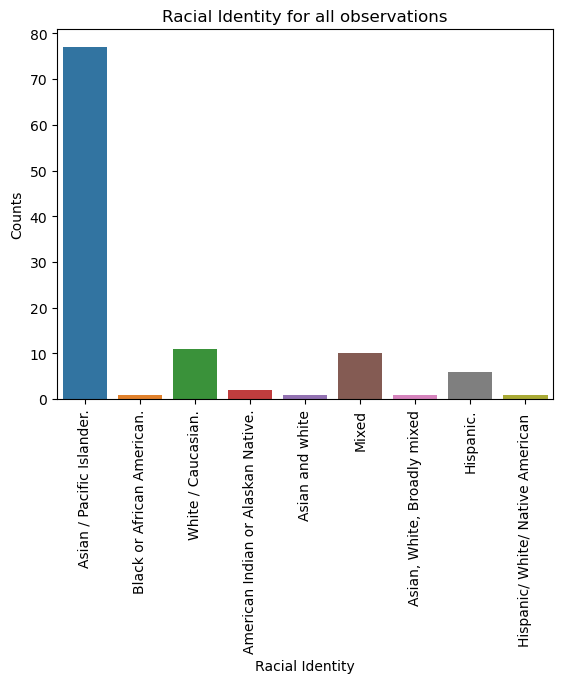

In [66]:
## Plot the Racial Identity counts for all survey participants
Enrolled_Racial_Identity_plot = sns.countplot(data = df, x = 'Racial Identity')
plt.xticks(rotation = 90)
plt.title("Racial Identity for all observations")
plt.ylabel("Counts")

In [57]:
# Separate the dataframe based on if they are currently enrolled in college or not
Enrolled = df.loc[df['Enrolled in College'] == 'True']

NonEnrolled = df.loc[df['Enrolled in College'] == 'False']

Text(0, 0.5, 'Counts')

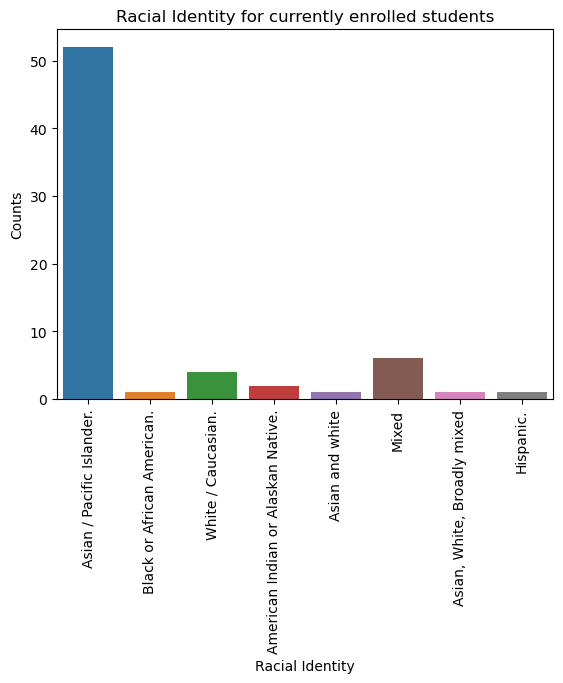

In [65]:
## Plot the Racial Identity counts for current college students
Enrolled_Racial_Identity_plot = sns.countplot(data = Enrolled, x = 'Racial Identity')
plt.xticks(rotation = 90)
plt.title("Racial Identity for currently enrolled students")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

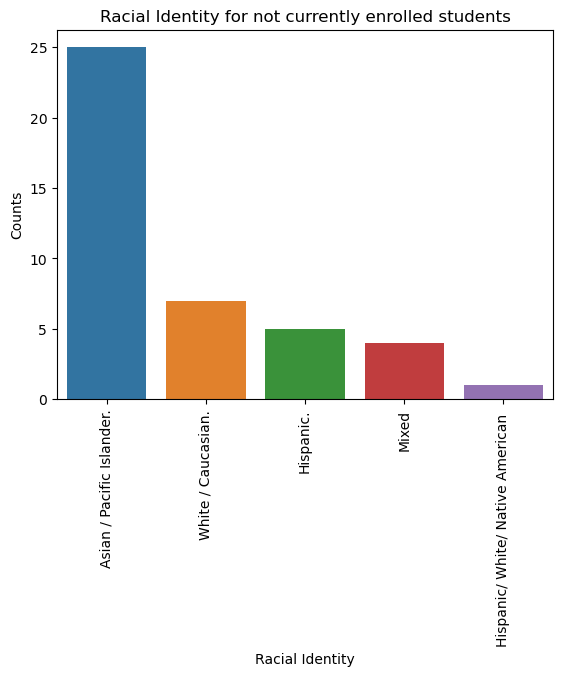

In [67]:
## Plot the Racial Identity counts for not currently enrolled college students
Enrolled_Racial_Identity_plot = sns.countplot(data = NonEnrolled, x = 'Racial Identity')
plt.xticks(rotation = 90)
plt.title("Racial Identity for not currently enrolled students")
plt.ylabel("Counts")

In [70]:
## Run a t-test to see if there is significant difference in Racial Identity changes form past members to current members
t_val, p_val = ttest_ind(Enrolled_Racial_Identity, NonEnrolled_Racial_Identity)

TypeError: unsupported operand type(s) for /: 'str' and 'int'